<a href="https://colab.research.google.com/github/yb-whilelearning/PythonProjects__ML/blob/main/Sigmoid_DecisionBoundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In the case of a single example, 𝑧
is scalar.
in the case of multiple examples, 𝑧
may be a vector consisting of 𝑚
values, one for each example.
The implementation of the sigmoid function should cover both of these potential input formats.
NumPy has a function called exp(), which offers a convenient way to calculate the exponential ( 𝑒𝑧) of all elements in the input array (z).

It also works with a single number as an input, as shown below.


In [6]:
# Input is an array.
input_array = np.array([1,2,3])
exp_array = np.exp(input_array)

print("Input to exp:", input_array)
print("Output of exp:", exp_array)

# Input is a single number
input_val = 1
exp_val = np.exp(input_val)

print("Input to exp:", input_val)
print("Output of exp:", exp_val)

Input to exp: [1 2 3]
Output of exp: [ 2.71828183  7.3890561  20.08553692]
Input to exp: 1
Output of exp: 2.718281828459045


Let us start implementing the sigmoid function directly: But remember we arent doing z= wx+b /Regression yet. This is simple sigmoid (to be edited later)

In [7]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z

    """

    g = 1/(1+np.exp(-z))

    return g

Some terms:
np.arange() is a function in NumPy.
It creates an array of numbers with evenly spaced values within a specified range.

It’s like Python’s built-in range(), but it returns a NumPy array instead of a plain Python list — and it can handle decimal steps too.

np.arange() is handy for quickly generating ranges — but for precise decimal spacing, np.linspace() is often better because it includes the end point and avoids rounding issues.

What does np.set_printoptions(precision=3) do?

This tells NumPy:
👉 “When you print arrays, show decimal numbers rounded to 3 decimal places.”
And why do we need it?
By default, NumPy might show lots of decimals — which can clutter your output.
This makes printed arrays cleaner and easier to read.

What does np.c do?
It stacks arrays side-by-side as columns.

In [8]:
# Generate an array of evenly spaced values between -10 and 10
z_tmp = np.arange(-10,11)

# Use the function implemented above to get the sigmoid values
y = sigmoid(z_tmp)

# Code for pretty printing the two arrays next to each other
np.set_printoptions(precision=3)
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y])

Input (z), Output (sigmoid(z))
[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]]


In [14]:
def draw_vthresh(ax, x=0, color='red', linestyle='--', label='threshold'):
    """
    Draws a vertical line at threshold x on the given Axes.
    """
    ax.axvline(x=x, color=color, linestyle=linestyle)
    ax.text(x + 0.2, 0.5, label, color=color)

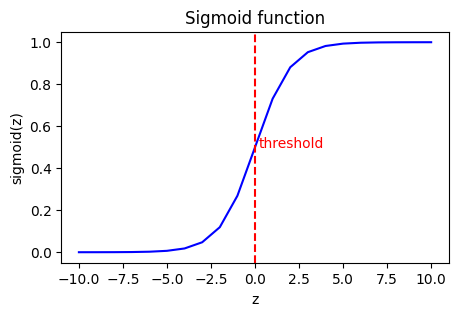

In [15]:
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp, y, c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
draw_vthresh(ax,0)



A short note on reshape:
-1 tells NumPy: “Figure out this dimension automatically, based on the data length.”
Here, you have 6 elements → so -1 becomes 6.

1 means: “One column.”

Now, we will plot feature scatter plot and create a decision boundary.




In [48]:
def plot_data(X, y,ax):
    """
    Plots 2D data with different markers for positive and negative examples.
    X : array-like, shape (m, 2) — features
    y : array-like, shape (m,) — labels (0 or 1)
    """
    # Find indices of positive and negative examples
    pos = y == 1
    neg = y == 0

    # Use given axis or create a new figure
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))

    ax.plot(X[pos, 0], X[pos, 1], 'k+', label='Positive', markersize=10)
    ax.plot(X[neg, 0], X[neg, 1], 'yo', label='Negative', markersize=8)

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()
    ax.grid(True)
    #ax.set_title(title)

    # Only show plot if not using subplot
    if ax is None:
        plt.show()

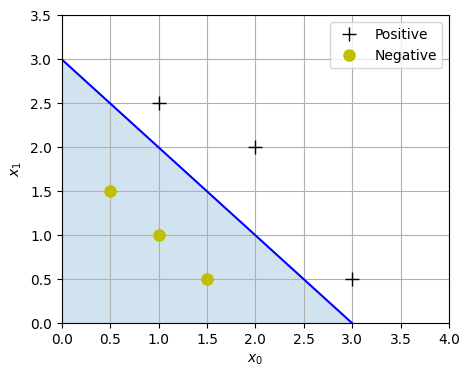

In [49]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])   #2D Array, 6,2
y = np.array([0, 0, 0, 1, 1, 1])

# Choose values between 0 and 6
x0 = np.arange(0,6)

x1 = 3 - x0
fig,ax = plt.subplots(1,1,figsize=(5,4))
# Plot the decision boundary
ax.plot(x0,x1, c="b")
ax.axis([0, 4, 0, 3.5])

# Fill the region below the line
ax.fill_between(x0,x1, alpha=0.2)

# Plot the original data
plot_data(X,y,ax)
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()